# Introduction to imshow_hs
This notebook introduces the parameters of the main function `imshow_hs` of the `graphics` module.

**Author**: Joseph Barraud ([@jobar8](https://github.com/jobar8))

After importing a few modules, we will start by loading some magnetic data in a 2D array. Then we will display the data using a modified version of the `pyplot.imshow` function.

In [7]:
%matplotlib inline
# import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Import local module
import graphics

## Loading data
OK, let's load some data. 

I have downloaded some aeromagnetic data from the USGS website. The survey was flown in an area in southwest New Mexico. It is part of a larger set of surveys that cover the entire state. A description of the data can be found [here](http://pubs.usgs.gov/of/2001/ofr-01-0061/html/nm_other.htm).

The original file is in GXF format and can be found [here](http://pubs.usgs.gov/of/2001/ofr-01-0061/data/GXF/mag4017_gxf.gz). I have used a simple [Python script](https://gist.github.com/jobar8/683483df605a906fb3da747b64627305) to load the GXF file and convert the data in a Numpy array.

Since I have already done the conversion to a Numpy file, loading it is as simple as:

In [8]:
# load magnetic data (USGS survey data)
mag = np.load(r'.\data\mag4017.npy')

## Standard imshow
Before demonstrating how the modified version works, let's see first how it looks with the standard version of `imshow`.

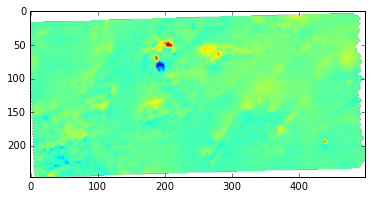

In [9]:
plt.imshow(mag)

That does not look very good. It is not only because the pseudocolors are drawn with the infamous "jet" rainbow-like colormap, but also because the amplitude of the anomalies are unevenly distributed: a couple of anomalies dominate the map and the rest is displayed with just a few shades of yellow, cyan and green. 

The other problem is that the map is upside-down as the original format puts the origin in the lower-left corner. This can be easily fixed by setting the extent of the grid with real-world coordinates. Let's try that with the one of the new matplotlib colormaps, "viridis".

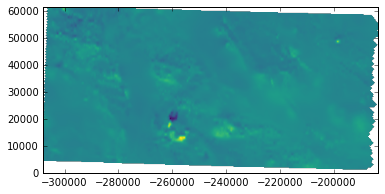

In [10]:
plt.imshow(mag,cmap='viridis',extent=(-308000.0, -183500.0, 0.0, 61500.0),origin='lower')

## Modified colorbar with imshow_hs
OK. Time to try `imshow_hs`. It works like `imshow` but it has additional arguments, some of them are actually just calling other pyplot functions, like `pyplot.colorbar`. The plot can be added to an existing figure if a reference to existing axes is given. For example:

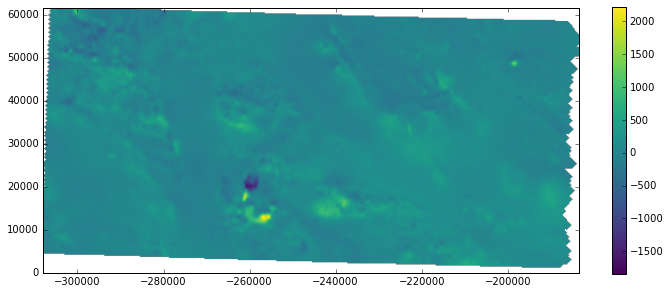

In [11]:
fig,ax = plt.subplots(figsize=(12,6))
graphics.imshow_hs(mag,ax,cmap='viridis',cmap_norm='nonorm',hs=False,colorbar=True,
                   extent=(-308000.0, -183500.0, 0.0, 61500.0),origin='lower')

There is one option for the colorbar that changes the position of the ticks and the labels. Instead of having them at regular intervals, they can be placed according to basic descriptive statistics: min, max, mean and standard deviation (sigma). To have ticks at mean+2\*mean and mean-2\*sigma, use:

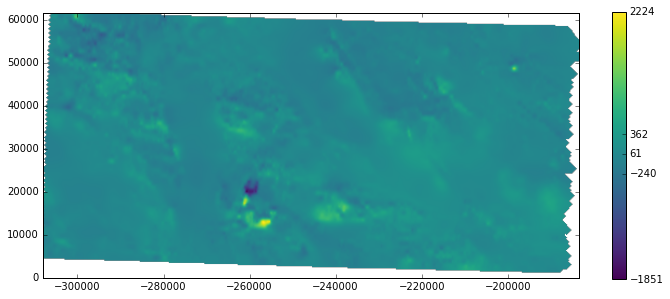

In [12]:
fig,ax = plt.subplots(figsize=(12,6))
graphics.imshow_hs(mag,ax,cmap='viridis',cmap_norm='nonorm',hs=False,colorbar=True,
                   cb_ticks='stats',nSigma=2,
                   extent=(-308000.0, -183500.0, 0.0, 61500.0),origin='lower')

## Histogram Equalization
The next option that `imshow_hs` introduces is the normalization of the colormap (`cmap_norm`). Normalization is already an option of `imshow`, and it remains one in `imshow_hs`. Its aim is to modify the distribution of intensities in the data in order to change the contrast or the brightness of the pseudocolored image (or exposure, using a photographic term that is also the name of a [submodule in scikit-image](http://scikit-image.org/docs/stable/api/skimage.exposure.html) that was the inspiration for this function).

Normalization of the colormap modifies the colormap instead of the data. It makes the changes clearly visible on the colorbar.
There are two choices:
* Histogram equalization (called with 'equalize' or 'equalization')
* Autolevels (called with 'auto' or 'autolevels')

The equalization stretches the histogram and spreads it more evenly, boosting the intensity of some levels and reducing the intensity of some others. The effect may look dramatic but it can be useful to detect small variations in the data.

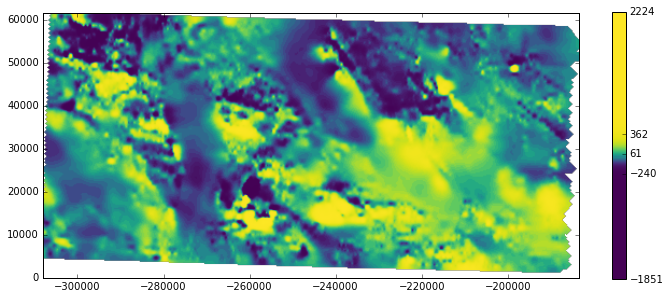

In [13]:
fig,ax = plt.subplots(figsize=(12,6))
graphics.imshow_hs(mag,ax,cmap='viridis',cmap_norm='equalize',hs=False,colorbar=True,
                   cb_ticks='stats',nSigma=2,
                   extent=(-308000.0, -183500.0, 0.0, 61500.0),origin='lower')

Another example of histogram equalization is shown below with the 'geosoft' colormap. This colormap (*clra* is the exact name) is popular in the community of geophysicists who interpret potential field data (from gravity and magnetic surveys essentially).

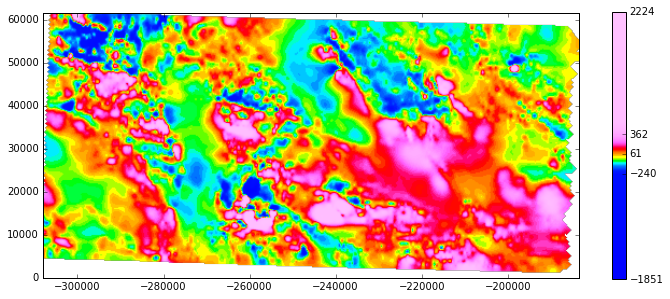

In [14]:
fig,ax = plt.subplots(figsize=(12,6))
graphics.imshow_hs(mag,ax,cmap='geosoft',cmap_norm='equalize',hs=False,colorbar=True,
                   cb_ticks='stats',nSigma=2,
                   extent=(-308000.0, -183500.0, 0.0, 61500.0),origin='lower')

The other method of normalization that is implemented in `imshow_hs` is 'autolevels'. It is actually a simple intensity rescaling with clipping of the extremes. It has two additional parameters, *minPercent* and *maxPercent*. It makes the colormap look brighter at high amplitude and darker for the lowest amplitudes.

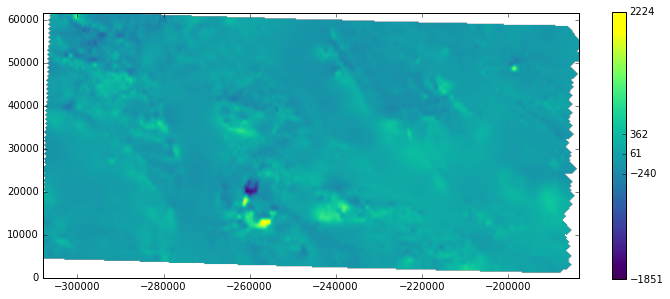

In [15]:
fig,ax = plt.subplots(figsize=(12,6))
graphics.imshow_hs(mag,ax,cmap='viridis',cmap_norm='autolevels',hs=False,colorbar=True,
                   cb_ticks='stats',nSigma=2,minPercent=2,maxPercent=98,
                   extent=(-308000.0, -183500.0, 0.0, 61500.0),origin='lower')

## Contours
Contour lines can be added with the `contours` option (True or False). 
The interval between the lines is automatically chosen if the `levels` argument is an integer. In this case, the number is the number of levels drawn on the map.
If you want more control on the intervals, give it a sequence of increasing values. Like so:

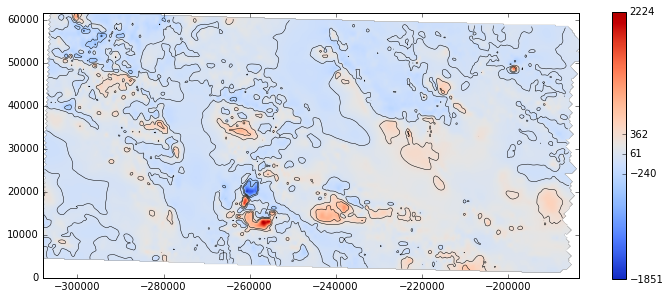

In [16]:
fig,ax = plt.subplots(figsize=(12,6))
graphics.imshow_hs(mag,ax,cmap='coolwarm',cmap_norm='autolevels',hs=False,colorbar=True,
                   cb_ticks='stats',nSigma=2,minPercent=2,maxPercent=98,
                   contours=True,levels=[-600,-300,0,300,600],
                   extent=(-308000.0, -183500.0, 0.0, 61500.0),origin='lower')

## Hillshade
The *hs* in `imshow_hs` stands for *hillshade*. It is activated with the *hs* argument (True or False, True by default).
The underlying algorithm for hillshading is controlled by the `LightSource` class from the `matplotlib.colors` module. So most of the arguments of `LightSource` are present in `imshow_hs`. For example:

C:\Anaconda2\lib\site-packages\matplotlib\colors.py:1747: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  blend[..., i][mask] = rgb[..., i][mask]


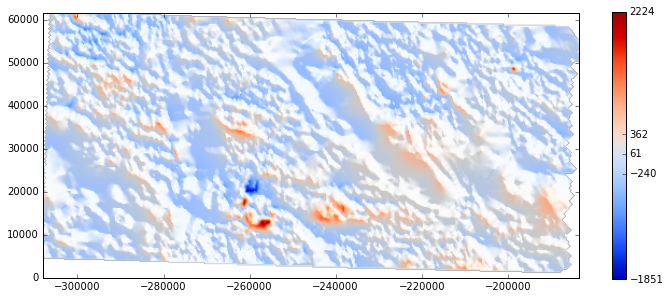

In [17]:
fig,ax = plt.subplots(figsize=(12,6))
graphics.imshow_hs(mag,ax,cmap='coolwarm',cmap_norm='autolevels',hs=True,colorbar=True,
                   cb_ticks='stats',nSigma=2,azdeg=45,altdeg=45,blend_mode='soft',
                   extent=(-308000.0, -183500.0, 0.0, 61500.0),origin='lower')

> Note that the azimuth of the light source is automatically corrected if the `origin='lower'` option is used. 

The `blend_mode` parameter controls the type of blending used to combine the pseudocolored data values with the hillshaded intensity. The three original modes of `LightSource` are possible ('hsv', 'soft', 'overlay'). I have added a fourth one, 'alpha', which is a simple linear combination of the two grids. This mode is controlled by a parameter *alpha* that corresponds to the transparency of the colored data (default is 0.7).

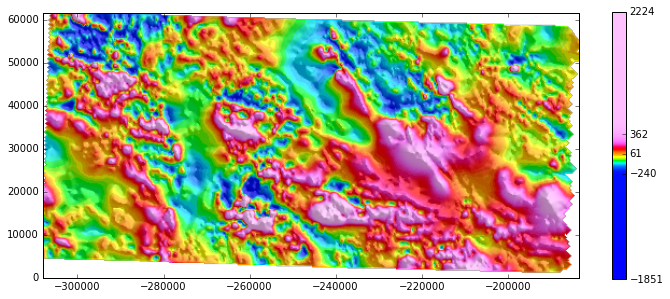

In [18]:
fig,ax = plt.subplots(figsize=(12,6))
graphics.imshow_hs(mag,ax,cmap='geosoft',cmap_norm='equalize',hs=True,colorbar=True,
                   cb_ticks='stats',nSigma=2,azdeg=45,altdeg=45,blend_mode='alpha',alpha=0.7,
                   extent=(-308000.0, -183500.0, 0.0, 61500.0),origin='lower')

## Discrete boundaries
As a final example, I am using one of the normalizing functions of `matplotlib.colors` to create a segmented colormap. Again, instead of using a simple linear function to map the data to the colors, I place the boundaries of the segments at meaningful values according to descriptive statistics.  
The function `stats_boundaries` in `graphics` is useful to create a list of values centred on the mean of the data with each interval being equal to a multiple of the standard deviation (*sigma*). The list is completed by the minimum and maximum values. With these boundaries, the new colormap will in effect rescale the intensities and clip the data outside the selected range.

In the example below, the "range of interest" is defined as (mean + or - 2\*standard deviations). Segments are placed every half-sigma. The result is in this case similar to the one obtained with histogram equalization.

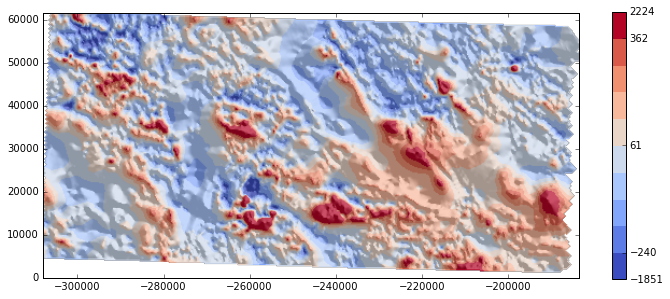

In [19]:
# first create a new normalization using discrete boundaries
import matplotlib.colors as mcolors
mynorm = mcolors.BoundaryNorm(graphics.stats_boundaries(mag,nSigma=2,sigmaStep=0.5),256)

fig,ax = plt.subplots(figsize=(12,6))
graphics.imshow_hs(mag,ax,cmap='coolwarm',cmap_norm='no',hs=True,colorbar=True,norm=mynorm,
                   cb_ticks='stats',nSigma=2,azdeg=45,altdeg=45,blend_mode='alpha',alpha=0.7,
                   extent=(-308000.0, -183500.0, 0.0, 61500.0),origin='lower')